# Artificial Intelligence in CyberSecurity

## Assignment 

### Name: Muhammad Nashit Qureshi

### Roll No. : CS-123/2022

### Objective

##### The aim of this project is to delve deeper into insights about the stock market, working with the data to build a model capable of predicting values using linear regression.

### Description

##### The dataset has stock price data of Starbucks since 26th June, 1992 till 5th Dec, 2023. The dataset consists of seven columns that represent seven unique features in the dataset about the stock market. Following is the brief explanation of what those columns represent. 

1. **Date**: This column represents the date of the stock market trading day. Each row corresponds to a specific date, and it's a temporal factor that allows you to track the stock's performance over time.

2. **Open**: The opening price of the stock on a particular trading day. It is the price at which the first transaction occurred when the market opened.

3. **High**: The highest price of the stock during the trading day. It represents the maximum price reached during that specific day.

4. **Low**: The lowest price of the stock during the trading day. It represents the minimum price reached during that specific day.

5. **Close**: The closing price of the stock on a particular trading day. It is the price at which the last transaction occurred when the market closed.

6. **Adj Close (Adjusted Close)**: The adjusted closing price takes into account corporate actions like dividends, stock splits, and new stock offerings. It provides a more accurate reflection of the stock's value over time, especially when comparing it with historical data.

7. **Volume**: The trading volume represents the total number of shares that were traded on a particular trading day. It indicates the level of market activity and liquidity.

##### A summary of these features would be 

- **Open**: Opening price of the stock.
- **High**: Highest price during the trading day.
- **Low**: Lowest price during the trading day.
- **Close**: Closing price of the stock.
- **Adj Close**: Adjusted closing price, accounting for corporate actions.
- **Volume**: Total number of shares traded during the day.

### Importing Libraries

In [78]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Loading the Dataset

In [79]:
# Load the dataset
df = pd.read_csv('C:/Users/ESHOP/Desktop/AI in Cys Assignment/SBUX.csv')

# Read the dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800
5,1992-07-06,0.351563,0.355469,0.347656,0.355469,0.279625,5753600
6,1992-07-07,0.355469,0.355469,0.347656,0.355469,0.279625,10662400
7,1992-07-08,0.355469,0.355469,0.343750,0.347656,0.273479,15500800
8,1992-07-09,0.351563,0.359375,0.347656,0.359375,0.282698,3923200
9,1992-07-10,0.359375,0.367188,0.351563,0.363281,0.285771,11040000


### Adding a New Column for Year

In [80]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400,1992
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800,1992
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600,1992
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800,1992
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800,1992
5,1992-07-06,0.351563,0.355469,0.347656,0.355469,0.279625,5753600,1992
6,1992-07-07,0.355469,0.355469,0.347656,0.355469,0.279625,10662400,1992
7,1992-07-08,0.355469,0.355469,0.343750,0.347656,0.273479,15500800,1992
8,1992-07-09,0.351563,0.359375,0.347656,0.359375,0.282698,3923200,1992
9,1992-07-10,0.359375,0.367188,0.351563,0.363281,0.285771,11040000,1992


### Description of the Data

##### The description shows the count, mean, standard deviation, minimum value in the column, first quartile, median, third quartile and the max value in the column.

In [81]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year
count,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7.919000e+03,7919.000000
mean,29.167637,29.458891,28.872252,29.173403,26.102653,1.477757e+07,2007.693269
std,33.045900,33.335687,32.749218,33.048777,31.446692,1.345930e+07,9.085794
min,0.328125,0.347656,0.320313,0.335938,0.264262,1.504000e+06,1992.000000
25%,4.323750,4.447500,4.224531,4.330312,3.406388,7.882600e+06,2000.000000
50%,13.090000,13.240000,12.957500,13.095000,10.328559,1.179460e+07,2008.000000
75%,54.330002,54.745001,53.919998,54.410000,47.360496,1.786600e+07,2016.000000
max,126.080002,126.320000,124.809998,126.059998,119.621147,5.855088e+08,2023.000000


### Distribution of Data

##### The following is the distribution of data of all the columns that shows the variation in the data.

<Figure size 2160x1440 with 0 Axes>

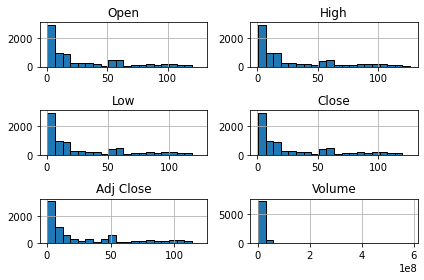

In [82]:
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] # for specific columns

plt.figure(figsize=(30, 20))
df[selected_columns].hist(bins=20, edgecolor='black', layout=(3, 2))
plt.tight_layout() # for better spacing
plt.show()

### Plots

##### First plot is between Open value of the stock on a certain day against the Close value of the stock on the same day. 

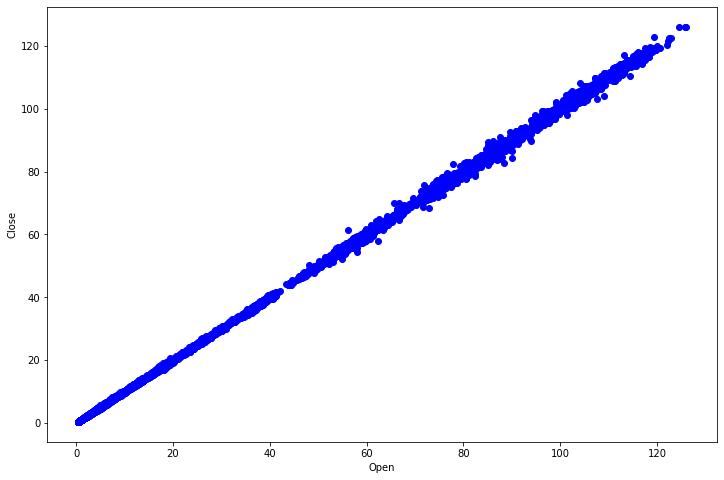

In [83]:
plt.figure(figsize=(12, 8))
plt.scatter(df.Open,df.Close,color='blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

##### Second plot is between Highest value of the stock on a certain day against the Lowest value of the stock on the same day. 

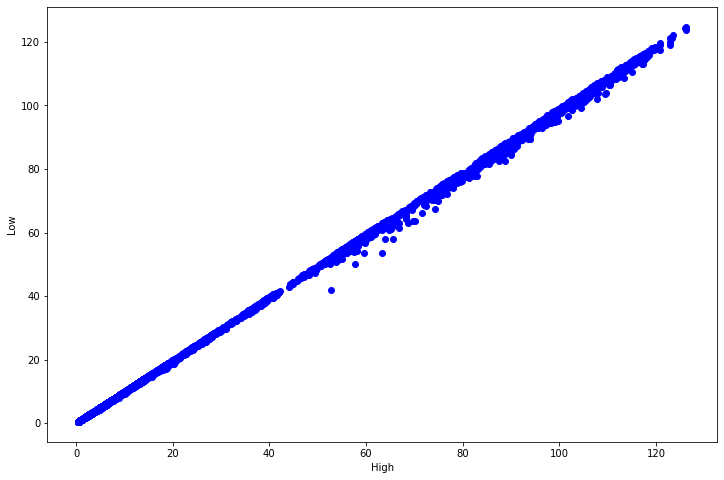

In [84]:
plt.figure(figsize=(12, 8))
plt.scatter(df.High,df.Low,color='blue')
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

##### Third plot is between Year against the Closing values of the stock.

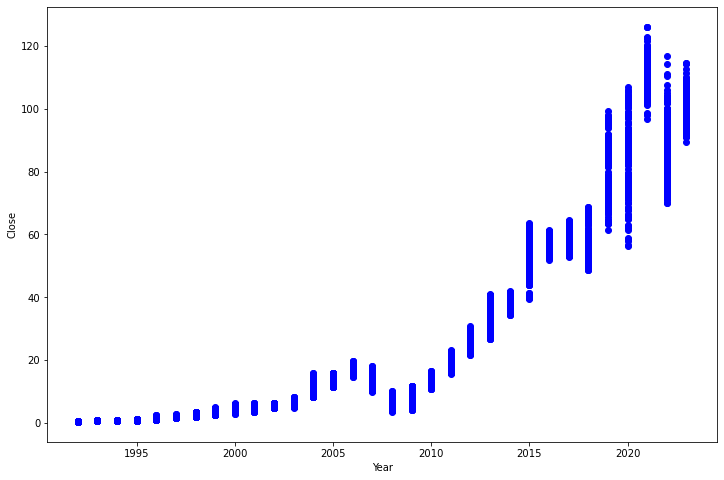

In [85]:
plt.figure(figsize=(12, 8))
plt.scatter(df.Year,df.Close,color='blue')
plt.xlabel("Year")
plt.ylabel("Close")
plt.show()

##### Fourth plot is between Year against the Adjusted Closing values of the stock.

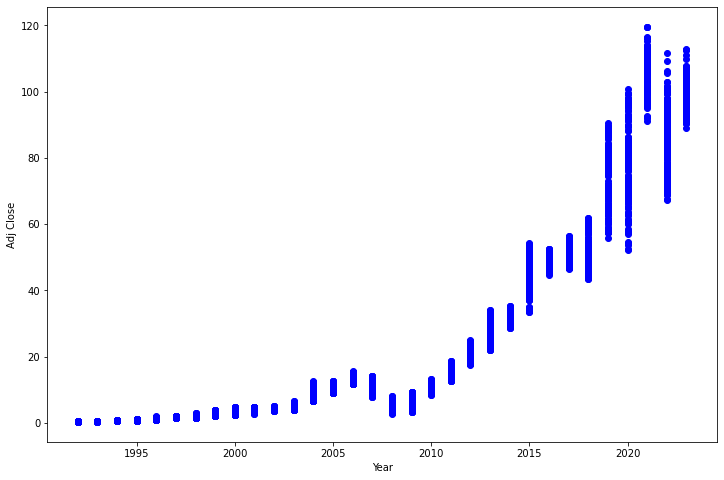

In [86]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Year'], df['Adj Close'], color='blue')
plt.xlabel("Year")
plt.ylabel("Adj Close")
plt.show()

##### Fifth plot is between Closing values of the stock against the Adjusted Closing values of the stock.

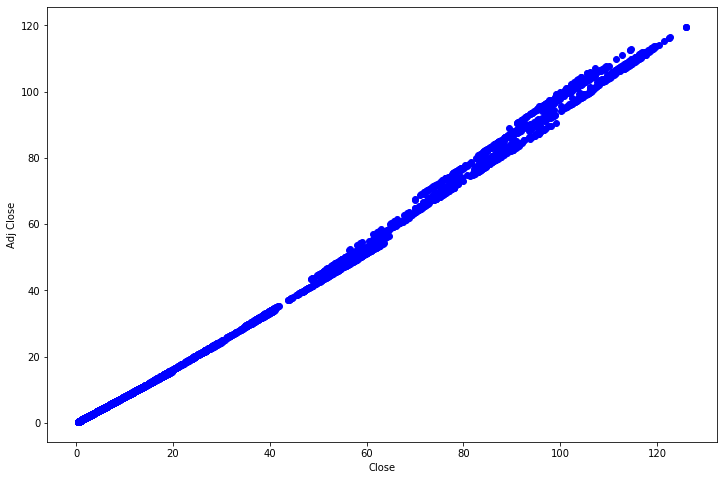

In [87]:
plt.figure(figsize=(12, 8))

plt.scatter(df['Close'], df['Adj Close'], color='blue')
plt.xlabel("Close")
plt.ylabel("Adj Close")
plt.show()

##### Sixth plot compares both the Closing Values and Adjusting Values of the Stock against Year.

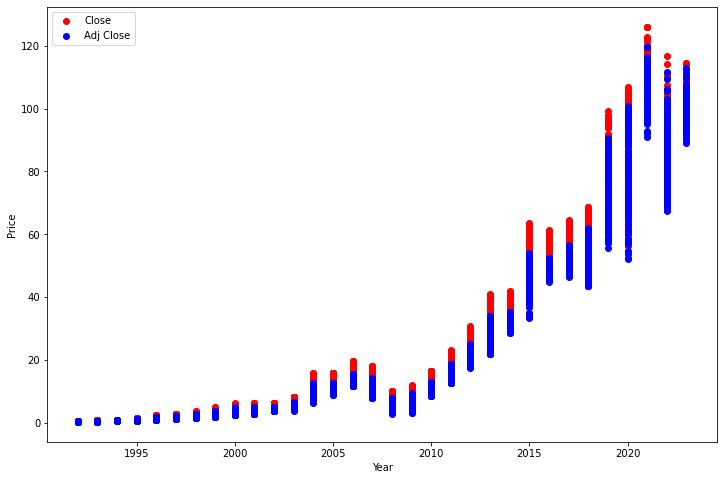

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.scatter(df['Year'], df['Close'], color='red', label='Close')
plt.scatter(df['Year'], df['Adj Close'], color='blue', label='Adj Close')

plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

### Feature Selection for Model

In [89]:
# Select relevant features (independent variables) and target variable (dependent variable)
features = df[['Open', 'High', 'Low', 'Volume']] 
target = df['Close']

### Training the Model

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Print the Coefficients and the Intercept 
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [-5.71229404e-01  8.17858909e-01  7.53025679e-01  3.60720306e-11]
Intercept:  -0.0008291466857315299


### Testing the Model

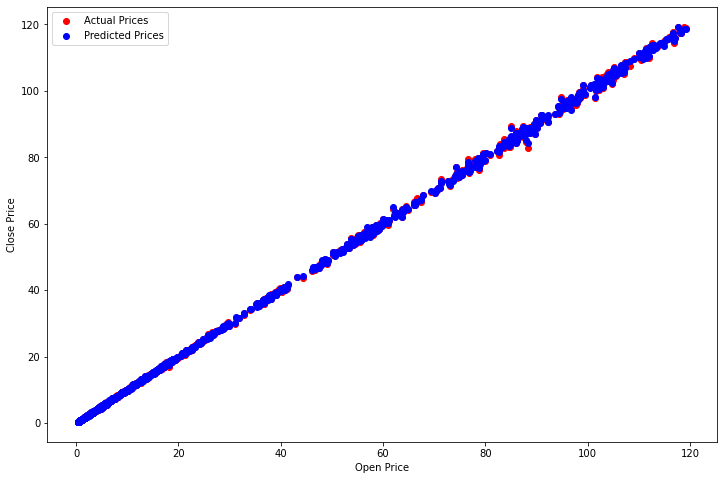

In [91]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Visualize the predicted vs. actual prices

plt.figure(figsize=(12, 8))
plt.scatter(X_test['Open'], y_test, color='red', label='Actual Prices')
plt.scatter(X_test['Open'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Evaluation of the Model

In [92]:
# Evaluate the model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score' , metrics.r2_score(y_test, y_pred))



Mean Absolute Error: 0.1197024437399309
Mean Squared Error: 0.048258280737892525
Root Mean Squared Error: 0.21967767464604254
R2 Score 0.9999551840180824


### Conclusion

##### The R2 score is a measure of how well the independent variable explain the variability in the dependent variable. The R2 score of the model used in this project suggests that the model is perfectly fit and can provide accurate results if there is not much variance in the data. Furthermore the errors provide more insight into the predictive accuracy of the model.